In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv('stats/oecd-average-hours-worked.csv')
df = df[df['EMPSTAT']=='TE']
df = df[['Country','Time','Value']]
df.head()

,Country,Time,Value
0,Australia,2000,1778.7
1,Australia,2001,1736.7
2,Australia,2002,1731.7
3,Australia,2003,1735.8
4,Australia,2004,1734.5


In [4]:
df.tail()

,Country,Time,Value
1079,Costa Rica,2011,2347.9
1080,Costa Rica,2012,2280.7
1081,Costa Rica,2013,2216.6
1082,Costa Rica,2014,2209.6
1083,Costa Rica,2015,2230.1


In [5]:
# check for duplicate rows
df[df.duplicated()]

,Country,Time,Value


In [6]:
pvt = df.pivot(index='Time', columns='Country', values='Value')
pvt.head()

Country,Australia,Austria,Belgium,Canada,Chile,Costa Rica,Czech Republic,Denmark,Estonia,Finland,...,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2000,1778.7,1807.4,1595.0,1779.0,2263.0,NaN,1896.0,1490.0,1978.0,1742.0,...,1917.0,1982.0,1816.0,1710.0,1752.8,1642.0,1673.6,1937.0,1700.0,1836.0
2001,1736.7,1794.6,1588.0,1771.0,2242.0,NaN,1818.0,1493.0,1970.0,1723.0,...,1900.0,1980.0,1801.0,1696.0,1762.5,1618.0,1635.0,1942.0,1705.0,1814.0
2002,1731.7,1792.2,1583.0,1754.0,2250.0,NaN,1816.0,1487.0,1973.0,1714.0,...,1894.0,1982.0,1754.0,1721.0,1764.6,1595.0,1614.0,1943.0,1684.0,1810.0
2003,1735.8,1783.8,1578.0,1740.0,2235.0,NaN,1806.0,1482.0,1978.0,1705.0,...,1887.0,1993.0,1698.0,1724.0,1755.9,1582.0,1626.8,1943.0,1674.0,1800.0
2004,1734.5,1786.8,1573.0,1760.0,2232.0,NaN,1817.0,1481.0,1986.0,1707.0,...,1893.0,1993.0,1742.0,1737.0,1741.5,1605.0,1656.5,1918.0,1674.0,1802.0


In [7]:
pvt.tail()

Country,Australia,Austria,Belgium,Canada,Chile,Costa Rica,Czech Republic,Denmark,Estonia,Finland,...,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2011,1699.5,1675.9,1560.0,1700.0,2047.4,2347.9,1806.0,1455.0,1919.0,1662.0,...,1867.0,1979.0,1793.0,1663.0,1715.5,1632.0,1605.4,1864.22,1634.0,1786.0
2012,1678.6,1652.9,1560.0,1713.0,2024.0,2280.7,1776.0,1437.0,1886.0,1650.0,...,1849.0,1982.0,1789.0,1636.0,1699.9,1618.0,1590.9,1855.06,1654.0,1789.0
2013,1662.7,1636.7,1558.0,1707.0,2015.3,2216.6,1763.0,1457.0,1866.0,1640.0,...,1859.0,1980.0,1772.0,1655.0,1695.6,1609.0,1572.9,1832.00,1666.0,1787.0
2014,1663.6,1629.4,1560.0,1703.0,1990.1,2209.6,1771.0,1458.0,1859.0,1643.0,...,1865.0,1985.0,1760.0,1676.0,1698.0,1611.0,1568.3,1832.00,1677.0,1789.0
2015,1665.0,1624.9,1541.0,1706.0,1987.5,2230.1,1779.0,1457.0,1852.0,1646.0,...,1868.0,1978.0,1754.0,1676.0,1691.3,1612.0,1589.7,NaN,1674.0,1790.0


In [8]:
pvt.columns


Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'OECD countries', 'Poland', 'Portugal',
       'Russian Federation', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

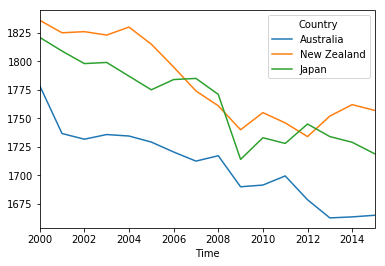

In [9]:
pvt[['Australia','New Zealand','Japan']].plot()

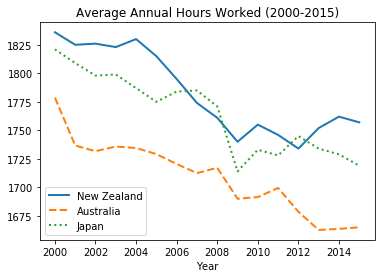

In [10]:
fig, ax = plt.subplots()
ax.plot(pvt.index, pvt['New Zealand'],'-', linewidth=2, label='New Zealand')
ax.plot(pvt.index, pvt['Australia'],'--', linewidth=2, label='Australia')
ax.plot(pvt.index, pvt['Japan'],':', linewidth=2, label='Japan')

ax.legend(loc='lower left')
ax.set_xlabel('Year')
plt.title('Average Annual Hours Worked (2000-2015)')
plt.show()